In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("HRDataset_v14.csv")

In [24]:
for index, row in df.iterrows():
    if row['HispanicLatino'] == 'No' and row['RaceDesc'] ==  'White':
        df.loc[index,"Racegroup"] = 'White'
    
    if row['HispanicLatino'] ==   'Yes' and row['RaceDesc'] ==  'White':
        df.loc[index,"Racegroup"] = 'Hispanic'

    if row['HispanicLatino'] ==   'Yes' and row['RaceDesc'] ==  'Black or African American':
        df.loc[index,"Racegroup"] = 'Hispanic'
    
    if row['HispanicLatino'] ==   'No' and row['RaceDesc'] ==  'White':
        df.loc[index,"Racegroup"] = 'White'

    if row['HispanicLatino'] ==  'No' and row['RaceDesc'] ==   'Black or African American':
        df.loc[index,"Racegroup"] = 'Black or African American'


    if row['HispanicLatino'] ==   'No' and row['RaceDesc'] ==   'Asian':
        df.loc[index,"Racegroup"] = 'Asian'

    if row['HispanicLatino'] ==  'No' and (row['RaceDesc'] ==   'Two or more races' or row['RaceDesc'] ==  'American Indian or Alaska Native'):
        df.loc[index,"Racegroup"] = 'Other'

In [25]:
# Convert 'DOB' to datetime format, with a bit of chaining to keep just the date
from dateutil.relativedelta import relativedelta
df['DOB'] = pd.to_datetime(df['DOB']).dt.date.astype('datetime64')

# No employees were born after year 2000, so DOBs like 2068 should have 100 years removed:
df.loc[df.DOB.dt.year > 2000, 'DOB'] -= pd.DateOffset(years=100)

# Now, to getting the age:
df['Age'] = pd.Series(dtype='int')
for ind, date in df.DOB.iteritems():
    df.loc[ind, 'Age'] = relativedelta(
        pd.to_datetime('today'), date).years
df.Age = pd.DataFrame(df.Age.astype('int64'))

In [26]:
df.loc[:,"Agegroup"]= pd.cut(df.Age, [25,40,55,70,75])

In [27]:
df.drop(columns="Age", axis=0, inplace = True)

In [28]:
df["Agegroup"]= df["Agegroup"].astype(str)

In [29]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Racegroup,Agegroup
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,White,"(25, 40]"
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,White,"(40, 55]"
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,White,"(25, 40]"
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,White,"(25, 40]"
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,White,"(25, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,White,"(25, 40]"
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Google Search,PIP,3.20,2,0,9/2/2015,5,4,Asian,"(25, 40]"
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,White,"(40, 55]"
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,White,"(40, 55]"


In [30]:
df.to_csv("RaceandAgeroup.csv")

In [31]:
df = df[["Racegroup","Agegroup"]]
df

,Racegroup,Agegroup
0,White,"(25, 40]"
1,White,"(40, 55]"
2,White,"(25, 40]"
3,White,"(25, 40]"
4,White,"(25, 40]"
...,...,...
306,White,"(25, 40]"
307,Asian,"(25, 40]"
308,White,"(40, 55]"
309,White,"(40, 55]"


In [32]:
df = pd.DataFrame(df.value_counts())

In [33]:
df.reset_index(drop=False,inplace=True)

In [34]:
df = df.rename(columns={0: "Count"})

In [35]:
df['Agegroup'] = df['Agegroup'].str.replace(',','-')

In [36]:
df['Agegroup'] = df['Agegroup'].str.replace(' ','')

In [37]:
df['Agegroup'] = df['Agegroup'].str.replace('(','')

/var/folders/65/l8gwbbg117z6hscwvjl3vg0m0000gn/T/ipykernel_3026/4030688868.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Agegroup'] = df['Agegroup'].str.replace('(','')


In [38]:
df['Agegroup'] = df['Agegroup'].str.replace(']','')

/var/folders/65/l8gwbbg117z6hscwvjl3vg0m0000gn/T/ipykernel_3026/2057630809.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Agegroup'] = df['Agegroup'].str.replace(']','')


In [39]:
pivot = pd.pivot_table(data=df,index="Agegroup",columns=['Racegroup'], values='Count').reset_index()
pivot

Racegroup,Agegroup,Asian,Black or African American,Hispanic,Other,White
0,25-40,11.0,30.0,14.0,9.0,78.0
1,40-55,16.0,34.0,11.0,4.0,71.0
2,55-70,2.0,7.0,1.0,NaN,18.0
3,70-75,NaN,1.0,NaN,NaN,1.0


In [40]:
pivot.drop(pivot[pivot['Agegroup'] == "70-75"].index, inplace = True)
pivot

Racegroup,Agegroup,Asian,Black or African American,Hispanic,Other,White
0,25-40,11.0,30.0,14.0,9.0,78.0
1,40-55,16.0,34.0,11.0,4.0,71.0
2,55-70,2.0,7.0,1.0,NaN,18.0


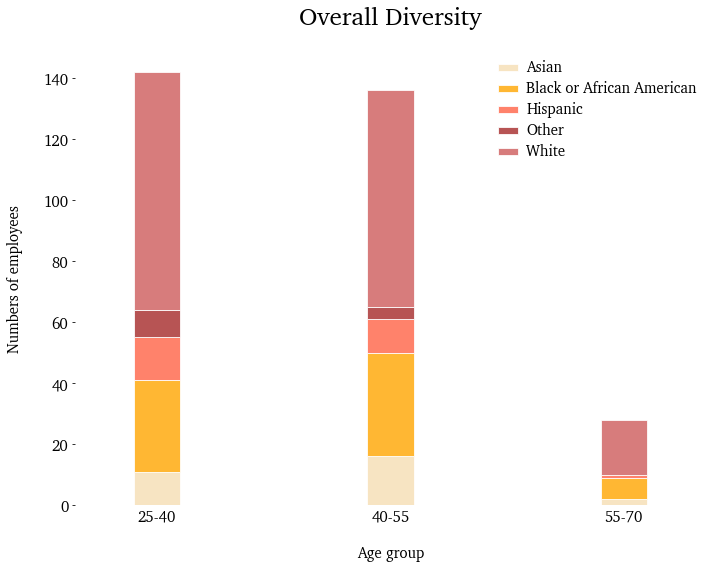

In [48]:
# plot
ax = pivot.plot.bar(x='Agegroup', stacked=True,
              color=['wheat','orange',"tomato","brown","indianred"], 
                    width=0.2,alpha= 0.8,
                   figsize = (10,8), edgecolor='white')
# rotate xtick
plt.xticks(rotation = "horizontal")

# BG color
ax.set_facecolor('white')

# remove grid line
ax.grid(False)

# Title of Bar Chart
plt.title('Overall Diversity', fontdict={'size': 25}, fontfamily = 'Charter', pad=26)

# hide ticks
ax.tick_params(axis=u'x', which=u'both',length=0)

# y label
ax.set_ylabel('Numbers of employees',fontdict={'size': 15}, fontfamily = 'Charter',labelpad=20)

# x label
ax.set_xlabel('Age group',
              fontfamily = 'Charter',fontdict={'size': 15}, labelpad=20)

# change the fontsyle of x-ticks and y-ticks
for tick in ax.get_xticklabels():
    tick.set_fontname("Charter")
for tick in ax.get_yticklabels():
    tick.set_fontname("Charter")

# legend
L = plt.legend()
plt.setp(L.texts, family='Charter', size=15)
L.set_frame_on(False)

#hide the frame
ax.set_frame_on(False) 
    
# change the size of x-ticks and y-ticks
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig('2.jpg',dpi=250)
plt.show()